## Importing libraries

In [1]:
import tensorflow as tf
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

In [2]:
tf.__version__

'2.4.1'

## Creating VGG16 model

### average pooling is being used to limit the final features

In [50]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

## Loading images

In [11]:
img_list = []


def load_images(class_name, path):
    filenames = glob.glob(path + class_name + '/*')
    for name in filenames:
        img = image.load_img(name, target_size=(224, 224))
        img_list.append(img)
    return img_list

In [64]:
path = '/home/vivana/projects/covid/X-Ray Image DataSet/'
covid_img = load_images('Covid-19', path)
no_finding_img = load_images('No-findings', path)
pneumonia_img = load_images('Pneumonia', path)

## showing random image
### to make sure we loaded images correctly

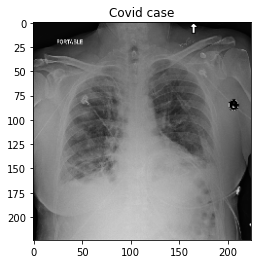

In [65]:
plt.title("Covid case")
plt.imshow(covid_img[np.random.choice(len(covid_img))])
plt.show()

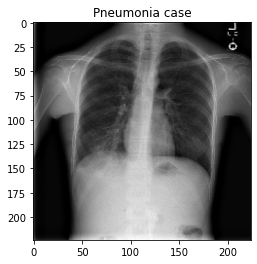

In [68]:
plt.title("Pneumonia case")
plt.imshow(pneumonia_img[np.random.choice(len(pneumonia_img))])
plt.show()

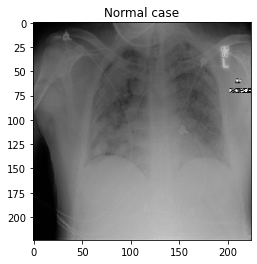

In [69]:
plt.title("Normal case")
plt.imshow(no_finding_img[np.random.choice(len(no_finding_img))])
plt.show()

## Image preprocessing and feature extracting

In [52]:
features = []


def feature_extractor(images):
    for img in images:
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        features.append(feature)
    return features

### Extracting features for all the classes

In [78]:
covid_features = feature_extractor(covid_img)

KeyboardInterrupt: 

In [70]:
pneumonia_features = feature_extractor(pneumonia_img)

KeyboardInterrupt: 

In [ ]:
normal_features = feature_extractor(no_finding_img)